In [31]:
import numpy as np
import sympy as sp

sp.init_printing(use_latex=True)


a = sp.Symbol("a", real=True, positive=True)
b = sp.Symbol("b", real=True, positive=True)
h = sp.Symbol("h", real=True, positive=True)

# Introduction
We investigate how to lay out three rings of six colors in a uniform way.


## Formulation
We want to solve for three layers of six colors in a hexagonal arrangement,
such that the distance between nearest neighbor colors between layers is equal
to some uniform value. WLOG, we take this uniform value to equal 1.

Specifically, we define the distance from the center of the first layer to be 1,
of the second layer to be $a$ and of the third layer to be $b$

We also want the distance between successive layers to be some constant $h $.

We express this in the two equations below (derived from the geometry of the
offset hexagons). First, the equation for $a$:

### Light background: expanding rings
We wish the colors in our rings to be of a consistent visual distance from the
background. For light backgrounds that means we want colorfulness to increase
as lightness increases.

Thus, we stipulate that $a > 1$ and $b > a$.


In [32]:
eq1 = sp.Eq(1, sp.Rational(1, 4) + (a - sp.sqrt(3) / 2) ** 2 + h**2).simplify()
eq1

We remark here that a can be at most $\sqrt 3$ (when $h = 0$). The equaion for
$b$:

In [33]:
eq2 = sp.Eq(1, (a / 2) ** 2 + (b - a * sp.sqrt(3) / 2) ** 2 + h**2).simplify()
eq2

We can solve the first of these to get equations for $b$ in terms of $a$

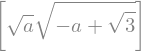

In [38]:
h_expr = sp.solve(eq1, h)
h_expr
# [0].simplify()
# h_expr

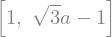

In [35]:
b_of_a = sp.solve(eq2.subs(h, h_expr), b)
b_of_a

The b = 1 solution is the one giving a symmetrical sandwich around the middle
layer. This violates $b > a$. We see that for the second solution, $b > a$ if
$a > \frac 1 {\sqrt 3 - 1} \approx 1.37$.

This gives a narrow range of valid $a$ values: $\sqrt 3 > a > \frac 1 {\sqrt 3 - 1}$

We can plot $a, b$ vs. $h$ in this range:

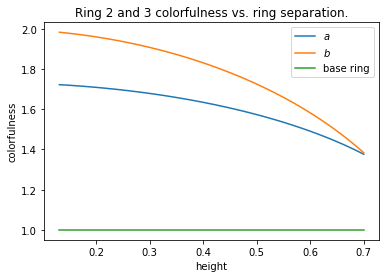

In [36]:
as_ = np.linspace(1 / (np.sqrt(3) - 1) + 0.01, np.sqrt(3) - 0.01, num=100)
f_h = sp.lambdify(a, h_expr)
f_b = sp.lambdify(a, b_of_a[1])

hs = f_h(as_)
bs = f_b(as_)

import matplotlib.pyplot as plt

plt.plot(hs, as_, label="$a$")
plt.plot(hs, bs, label="$b$")
plt.plot(hs, np.ones(len(as_)), label="base ring")
plt.legend()
plt.xlabel("height")
plt.ylabel("colorfulness")
plt.title("Ring 2 and 3 colorfulness vs. ring separation.")
plt.show()

Any of these values gives an "acceptable" solution. To pick one, we can make
one final constraint: let the $b = 1$ solution points have the target lattice
distance of $1$ from their hue-mates in the $b = a \sqrt 3 - 1$ solution.

This implies that $b = 2 \implies a = \sqrt 3$.

This is a pleasing result, though in hindsight not surprising, because this
last constraint turns the top and bottom rings into a subset of a hexagonal
close-packed lattice.